<a href="https://colab.research.google.com/github/dahmansphi/differential_privacy_with_ai_and_ml/blob/main/diff_privacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home

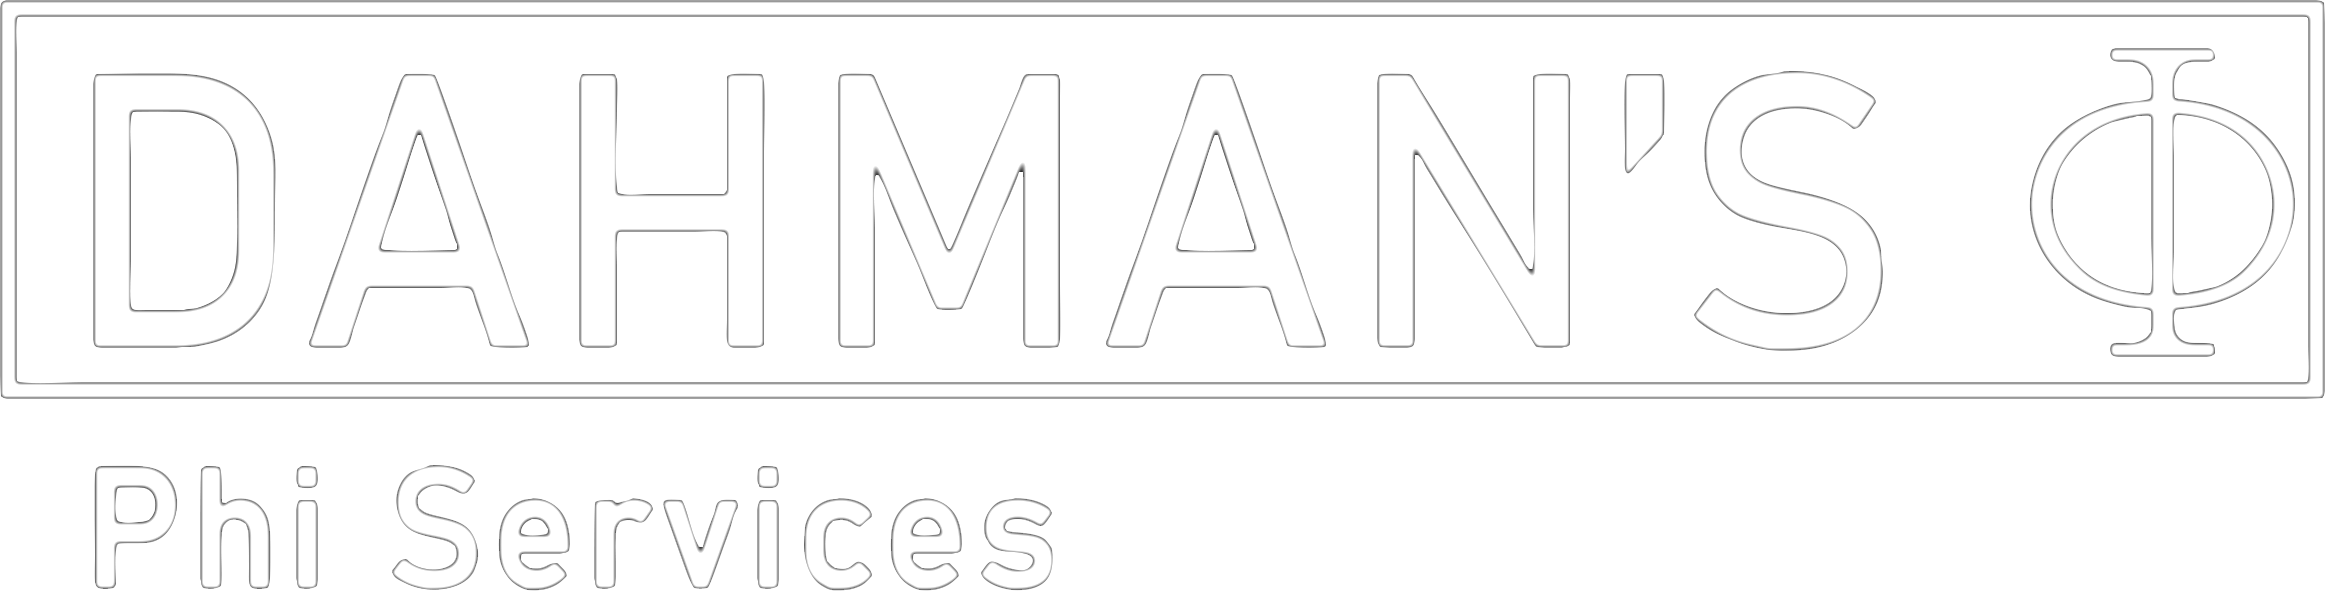

**Differential Privacy with Machine Learning**


---



This notebook encompasses all the LAB sessions for the training on [Differential Privacy with ML]. The LAB utilizes a single dataset to illustrate various aspects of the topic. The data availability outlines the dataset's reference.

**Note**:
the dataset is published for (Heart Failure Clinical Records). However, in this tutorial:

1.   I will be using a different binary feature, namely '**Diabetes**', in relation to *age and gender*. The dataset does not include name features (i.e., it is anonymized) or zip codes. Consequently, I have decided to generate random names and zip codes to simulate various data privacy breach scenarios.
2.   The outcome is a dataset titled "Amended_heart_failure_clinical" which corresponds to the original dataset but includes two additional features: name and zipcode;
3.   Next, I anonymized the dataset titled 'Amended_heart_failure_clinical' by removing the name attribute, resulting in a dataset named 'Anonymized_name_heart_failure_clinical'
4.   I utilized the (Amended_heart_failure_clinical) to generate a new dataset that simulates a linkage attack scenario. In this scenario, the dataset is presumed to belong to a telecom company and includes features such as (name, zip, gender, and calling/time). This dataset is referred to as (telecom_ds).  


**Data Availability** :

The Heart Failure Clinical Records dataset available in [UCI Machine Learning Repository](https://doi.org/10.24432/C5Z89R),


# Initial Libraries

In [ ]:
from urllib.request import Request, urlopen
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Preparation

**Creating Illustrative Random Names**

## Generating Names Section

In [ ]:
'''This block generate random names and attach them to the dataset for further work'''

'''
  # referrence
  URL: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data
  Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict diabets or mortality
'''


# paths for the block are needed as name implies
ds_original_form = "/content/drive/MyDrive/Colab Notebooks/differential_privacy/Original_heart_failure_clinical.csv"
word_url = "https://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"

ds_altered_form = "/content/drive/MyDrive/Colab Notebooks/differential_privacy/Amended_heart_failure_clinical.csv"



def gen_names(num_names):
  '''This function take care of generating random names, it take one arg that is the number of names to be generated'''
  req = Request(
      url=word_url,
      headers={'User-Agent': 'Mozilla/5.0'}
  )

  response = urlopen(req)
  long_txt = response.read().decode()
  words = long_txt.splitlines()


  upper_words = [word for word in words if word[0].isupper()]
  name_words  = [word for word in upper_words if not word.isupper()]
  one_name = ' '.join([name_words[random.randint(0, len(name_words)-1)] for i in range(2)])

  nam_list = []
  for n in range(num_names):
    name = rand_name(name_words)
    nam_list.append(name)

  return nam_list

def rand_name(name_words):
  '''this function generate the random name itself'''
  name = ' '.join([name_words[random.randint(0, len(name_words)-1)] for i in range(2)])
  return name

def zipcode(numcode):
  ziplist = []

  for i in range(numcode):
    num = random.randrange(34, 39)
    ziplist.append(num)
  return ziplist

def ds_open(ds_path):
  '''this function open the original ds and add the names to the ds'''
  df = pd.read_csv(ds_path)

  ## generate random names
  df["Names"] = gen_names(299)

  ## generate random zip
  df["zip"] = zipcode(299)

  ## view the ds
  print(df.to_string())

  ## save the ds
  df.to_csv(ds_altered_form)

ds_open(ds_original_form)


## Dataset Path import

In [ ]:
ds_path_annom = "https://github.com/dahmansphi/differential_privacy_with_ai_and_ml/blob/main/datasets/Anonymized_name_heart_failure_clinical.csv"
ds_path_org = "https://github.com/dahmansphi/differential_privacy_with_ai_and_ml/blob/main/datasets/Amended_heart_failure_clinical.csv"

ds_tel_path = "https://github.com/dahmansphi/differential_privacy_with_ai_and_ml/blob/main/datasets/telecom_ds.csv"

ds_noise_synthetic = "https://github.com/dahmansphi/differential_privacy_with_ai_and_ml/blob/main/datasets/noise_synthetic_ver.csv"

**This class will address the following questions, which can be as part of research publications or independent research work**.



*   The sahpe of the dataset?
*   Name of the features?
*   View of the first 5 head rows in the dataset?
*   Report the data type of each feature in the dataset?
*   View discribtion on continues and categorical data type features?
*   what is the avarage age of people with diabets, their age group dist and their geo locations?
*   what is the sex distribution of people with diabets?
*   number of smokers with diabets?



In [ ]:
class AnalysisCls:
  '''This class illustrate initiall analysis on the dataset that address number of questions
    each of which can be considered as research publishing work of indpendent research as well.
  '''
  def __init__(self, ds) -> None:
    self.df_ana = pd.read_csv(ds)
    self._brek = "-" * 25
    self._star = "*" *60
    print('Dataset with Shape', self.df_ana.shape)
    print(self._brek)
    print("Name of the features as follows:")
    print(self.df_ana.columns)
    print(self._brek)
    print(self._star)

  def _head(self):
    print("View on the first head 5 of entries")
    print(self._brek)
    # self.df_ana.head()
    display(self.df_ana.head(5))
    print(self._brek)
    print(self._star)

  def _info(self):
    print("General Infor on the DS")
    print(self._brek)
    display(self.df_ana.info())
    print(self._brek)
    print(self._star)

  def _describe(self):
    print("General Describtion of the DS")
    print(self._brek)
    contin = self.df_ana[['age', 'creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','zip']]
    catg = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

    print("Continues Feature Values")
    print(self._brek)
    display(contin.describe())
    print(self._brek)
    print(self._brek)

    print("Categorical Feature Values")
    print(self._brek)
    print(self._brek)
    for feature in catg:
      print(f"Feature {feature} has the following describtion")
      display(self.df_ana[feature].value_counts())
      print(self._brek)

    print(self._brek)
    print(self._star)

  def _avg(self):
    print(self._brek)
    val = (self.df_ana[self.df_ana["diabetes"] == 1]["age"].mean())
    print(f"Avg age of people with diabets is {val}")
    display(self.df_ana[self.df_ana["diabetes"] == 1]["age"].describe())
    print(self._brek)
    print(self._brek)
    print("The age group distribution is as follows:")

    bins = [40, 65, 80, 95]
    group = ['40-65', '65-80', '80-95']
    self.df_ana['age'] = pd.cut(self.df_ana['age'], bins=bins, labels=group, right=False).cat.add_categories('missing').fillna('missing')
    display(self.df_ana[self.df_ana["diabetes"] == 1]["age"].value_counts(normalize=True))
    print(self._brek)
    print(self._brek)

    print("The distribution of their geo location is as follow:")
    display(self.df_ana[self.df_ana["diabetes"] == 1]["zip"].value_counts(normalize=True))
    print(self._star)

  def _count(self):
    print(self._brek)
    print("distribution of people with diabets and smokers is as follows:")
    display(self.df_ana[self.df_ana["diabetes"] == 1]["smoking"].value_counts(normalize=True))
    print(self._brek)
    print(self._star)

    print("distribution of six for people with diabets as follows:")
    display(self.df_ana[["diabetes","sex"]].value_counts())
    display(self.df_ana[self.df_ana["diabetes"] == 1]["sex"].value_counts(normalize=True))
    print(self._brek)
    print(self._star)

    dis = ['sex', 'age', 'smoking']
    for i in dis:
      sns.countplot(x=i, hue="diabetes", data=self.df_ana[self.df_ana["diabetes"] == 1])
      plt.show()

  def report(self):
    self._head()
    self._info()
    self._describe()
    self._avg()
    self._count()



inst = AnalysisCls(ds_path_annom)
inst.report()


## Create ML Prediction Model

View DS org and anonm

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression


class MLAgent:
  '''This class illustrae the creation of ML model based on the analysis of the previous section'''
  def __init__(self, dspath) -> None:
    self.df = pd.read_csv(dspath)
    self.X = None
    self.y = None
    self.X_train,self.X_test,self.y_train,self.y_test = None, None, None, None

  def head(self):
    return self.df.head()
  def info(self):
    return self.df.info()
  def describe(self):
    return self.df.describe()

  def cls(self):
    normal = self.df[self.df['diabetes']==0]
    diabet = self.df[self.df['diabetes']==1]

    diabet_upsample = resample(diabet,replace=True,n_samples=len(normal),random_state=42)
    diabet_upsample = pd.concat([normal,diabet_upsample])

    diabet_upsample['diabetes'].value_counts()

    sns.heatmap(diabet_upsample.corr())
    df = diabet_upsample.copy()
    self.X = df.drop(['diabetes'],axis=1)
    self.y = df['diabetes']


    self.X_train,self.X_test,self.y_train,self.y_test = train_test_split(self.X,self.y,test_size=0.20,random_state=42)

    return diabet_upsample['diabetes'].value_counts()

  def viewX(self):
    return self.X
  def viewy(self):
    return self.y

  def randomForestClassifier(self):
    X_train,X_test,y_train,y_test = self.X_train,self.X_test,self.y_train,self.y_test

    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    pred = rf.predict(X_test)
    print(accuracy_score(y_test,pred))

  def logisticReg(self):
    X_train,X_test,y_train,y_test = self.X_train,self.X_test,self.y_train,self.y_test

    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    print(accuracy_score(y_test,pred))


# ds_path_annom
# ds_noise_synthetic


inst = MLAgent(dspath=ds_path_annom)

# # report on the class that need to be classified
inst.cls()

# # you can view X and y
# inst.viewX()
# inst.viewy()


# # create prediction models of two different types
inst.randomForestClassifier()
inst.logisticReg()

## Create ML ANN Model

In [ ]:
import warnings

class AnnModel:
  def __init__(self) -> None:
    warnings.filterwarnings('ignore')

    self.x = None
    self.y = None
    self.w = None
    self.b = None

  def defin_ds(self, ds, nois = False):
    self.df_import = pd.read_csv(ds)
    self._model = None

    self.dsOrg_col = ['age', 'anaemia', 'creatinine_phosphokinase',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'zip']

    self.dsNois_col = ['zip_noise', 'age_synthetic', 'anaemia', 'creatinine_phosphokinase',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

    self.y_col = ['diabetes']

    if nois == False:
      self.cols = self.dsOrg_col
    else:
      self.cols = self.dsNois_col

    # create the df
    self.df = self.df_import[self.cols]
    self.df_y = self.df_import[self.y_col]

    # create the X and y mat
    self.X_org = self.df.iloc[:,:].values
    self.y_org = self.df_y.iloc[:].values

    norm_x = np.linalg.norm(self.X_org)
    self.X_org = self.X_org/norm_x


    self.X_test = self.X_org[280:,:]
    self.y_test = self.y_org[280:]


    self.X = self.X_org[:280,:]
    self.y = self.y_org[:280]

  # The activation function
  def activation(self,x):
    return 1 / (1 + np.exp(-x))

  def __call__(self, Y_hat, Y):
      assert(Y_hat.shape == Y.shape)
      Y_hat_ = np.atleast_2d(Y_hat)
      Y_ = np.atleast_2d(Y)

      Y_hat_ = Y_hat_.reshape(-1, Y_hat_.shape[-1])
      Y_ = Y_.reshape(-1, Y_.shape[-1])

      return 0.5*np.sum((Y_hat_-Y_)**2)/Y_hat_.shape[0]

  def gradient(self, Y_hat, Y):
      assert(Y_hat.shape == Y.shape)
      return (Y_hat-Y)/np.prod(Y_hat.shape[:-1])

  def trainMod(self, ep, lr):
    # A 2 x 1 matrix of randomly generated weights in the range -1 to 1
    weights = np.random.uniform(-1,1,size = (self.X.shape[1], 1))


    for i in range(ep):
      # forward pass
      dot_product = np.dot(self.X, weights)
      output = self.activation(dot_product)

      cls = (self.__call__(output, self.y))
      temp2 = (self.gradient(output, self.y))
      adj = np.dot(self.X.transpose(), temp2)

      # 0.5 is the learning rate.
      weights = weights - lr * (adj * cls)

    test_output = self.activation(np.dot(self.X_test, weights))

    acc = 0
    for i in range(len(test_output)):
      if test_output[i] > 0.51:
        val = 1
      else:
        val = 0

      if val -self.y_test[i] == 0:
        acc +=1
      print(val, self.y_test[i], val -self.y_test[i] )
      # print(test_output[i], self.y_test[i], test_output[i] -self.y_test[i] )

    print(f"Total Acc = {(acc / len(self.y_test)*100)}")



instan = AnnModel()
instan.defin_ds(ds=ds_path_annom, nois=False)
instan.trainMod(1000, 0.1)



# Ilustration of Different Privacy Breach

In [ ]:
class PrivacyCls:
  '''This class demonistrate number of privacy breaches'''
  def __init__(self) -> None:
    self._str = "*" * 25
    self._lin = "_" * 15


  def linkage_query_breach(self, ds_1, ds_2,query):
    '''This function reciev the query and link two ds togther through the query'''
    self._df_tel = pd.read_csv(ds_1)
    print("This is a view from the ds_1 firt 10 rows")
    print(self._lin)
    display(self._df_tel.head(10))
    print(self._lin)
    print(self._str)

    self._df_diabet = pd.read_csv(ds_2)
    print("This is a view from the ds_2 firt 10 rows")
    print(self._lin)
    display(self._df_diabet.head(10))
    print(self._lin)
    print(self._str)


    print("The answer of the query is as follow using the ds1:")
    print(self._lin)
    self._query(query=query)
    print(self._lin)
    print(self._str)


    print("The answer of the query linking to ds2 is as follow:")
    print(self._lin)
    self._diabetds(q=query)
    print(self._lin)
    print(self._str)

  def _query(self, query):
    '''disassemble linkageattack and answer the query'''
    listTub = []
    for k,v in query.items():
      listTub.append((k,v))
    display(self._df_tel[(self._df_tel[listTub[0][0]] == listTub[0][1]) & (self._df_tel[listTub[1][0]] == listTub[1][1]) & (self._df_tel[listTub[2][0]] == listTub[2][1])][['Names',	'age',	'gender',	'zip'	]])

  def _diabetds(self, q):
    '''This function does the query on the second ds and match results'''
    listTub = []
    for k,v in q.items():
      listTub.append((k,v))
    display(self._df_diabet[(self._df_diabet['sex'] == listTub[0][1]) & (self._df_diabet[listTub[1][0]] == listTub[1][1]) & (self._df_diabet[listTub[2][0]] == listTub[2][1])][['diabetes','age','sex','zip']])

  #*****************************************

  def linkage_query_on_anno(self, ds_1, ds_2, query):
    self.df_tele_set = pd.read_csv(ds_1)
    print("This is a view from the ds_1 firt 10 rows")
    print(self._lin)
    display(self.df_tele_set.head(10))
    print(self._lin)
    print(self._str)

    # do k-annonymization on the age
    self.bins = [40, 65, 80, 95]
    self.group = ['40-65', '65-80', '80-95']

    self.df_diabet_set = pd.read_csv(ds_2)
    #  apply the annonymization
    self.df_diabet_set['age'] = pd.cut(self.df_diabet_set['age'], bins=self.bins, labels=self.group, right=False).cat.add_categories('missing').fillna('missing')
    print("This is a view from the ds_2 firt 10 rows")
    print(self._lin)
    display(self.df_diabet_set.head(10))
    print(self._lin)
    print(self._str)


    print("The answer of the query is as follow using the ds1:")
    print(self._lin)
    self._query_annom(query=query)
    print(self._lin)
    print(self._str)


    print("The answer of the query linking to ds2 is as follow:")
    print(self._lin)
    self._diabetds_annom(q=query)
    print(self._lin)
    print(self._str)


  def _query_annom(self,query):
    '''disassemble linkageattack and answer the query'''
    listTub = []
    for k,v in query.items():
      listTub.append((k,v))
    display(self.df_tele_set[(self.df_tele_set[listTub[0][0]] == listTub[0][1]) & (self.df_tele_set[listTub[1][0]] == listTub[1][1]) & (self.df_tele_set[listTub[2][0]] == listTub[2][1])][['Names',	'age',	'gender',	'zip'	]])

  def _diabetds_annom(self,q):
    '''This function does the query on the second ds and match results'''
    listTub = []
    for k,v in q.items():
      listTub.append((k,v))

    # adjust the set with annonm tech
    age_val = listTub[2][1]
    age_group_com = None

    if age_val < 95:
      for inx in range(len(self.bins)):
        inx_val = inx + 1
        if inx_val <= len(self.group):
          isTrue = age_val < self.bins[inx_val]
          if isTrue:
            # print(age_val, self.bins[inx_val])
            age_group_com = self.group[inx]
            break
    else:
      age_group_com = self.group[2]

    display(self.df_diabet_set[(self.df_diabet_set['sex'] == listTub[0][1]) & (self.df_diabet_set[listTub[1][0]] == listTub[1][1]) & (self.df_diabet_set[listTub[2][0]] == age_group_com)][['diabetes','age','sex','zip']])

  #*****************************************
  def laplace(self, b_list):
    '''This function illustrates the Laplace Function pdf and cdf'''
    for b in b_list:
      x = np.linspace(-2,2,100)

      # pdf
      y = (np.e ** (-abs((abs(x - np.mean(x))/b))) * (1/(2*b)) )
      lin = f"epsilon val of {b}"
      plt.plot(x,y, label=lin)
      plt.title("PDF of Laplace Distribution")
      plt.legend()
    plt.show()

    for b in b_list:
      x = np.linspace(-2,2,100)

      # cdf
      y_cum = (0.5*(1+(np.sign(x-np.mean(x))) * (1-(np.e ** (-abs((abs(x - np.mean(x))/b)))))))
      lin = f"epsilon val of {b}"
      plt.plot(x,y_cum, label=lin)
      plt.title("CDF of Laplace Distribution")
      plt.legend()
    plt.show()

  def _noise_avg(self, ds, epsilon):
    df = ds

    max_val = df['age'].max()

    avg_befor_noise = df['age'].mean()
    avg_after_remov_max = (df['age'].sum()-max_val)/len(df['age'])

    print(self._str)
    print(self._lin)
    print("Illustration on adding Noise for Avg Function")
    print(self._lin)
    print(f"The avg value of age BEFORE adding noise is {avg_befor_noise}")
    print(f"The avg value of age after removing max value age {max_val} is {avg_after_remov_max}")
    print(self._lin)
    print(self._lin)

    sensetiviy_avg = avg_befor_noise - avg_after_remov_max
    print(f"The sensetivity of both avgs is {sensetiviy_avg}")

    print(self._lin)
    b_val = sensetiviy_avg / epsilon
    print(f"The b value = (sensetivity/epsilon) in Laplace to add noise is {b_val}")
    print(self._lin)
    print(self._lin)

    avg_after_adding_noise = (df['age']) + np.random.laplace(loc=0, scale=b_val)
    print(f"The avg value of age AFTER adding noise is {np.mean(avg_after_adding_noise)}")
    print(self._lin)
    print(self._str)


  def _noise_counting(self, ds, epsilon):
    df = ds

    print(self._str)
    print(self._lin)
    print("Illustration on adding Noise for Counting Function")
    print(self._lin)


    count_before_adding_noise = (len(df['age']))
    count_after_adding_noise = (len(df['age'])) + np.random.laplace(loc=0, scale=1/epsilon)

    print(f"The counting value of age BEFORE adding noise is: {count_before_adding_noise}")
    print(self._lin)

    print(f"The counting value of age AFTER adding noise is {count_after_adding_noise}")
    print(self._lin)
    print(self._str)

  def query_fun_added_noise(self, ds, epsilon):
    df = pd.read_csv(ds)

    self._noise_avg(ds=df, epsilon=epsilon)
    self._noise_counting(ds=df, epsilon=epsilon)

  # ********************************************
  def synthetic_data(self, ds):
    '''This function illustrates the implementaion of generating synthetic data for the age using marginal distribution'''
    df = pd.read_csv(ds)

    print(self._str)
    print("This is illustration on generating Synthetic data using Marginal Distribution")

    print(self._lin)
    print(self._lin)
    print("The orginal Value count of Age is as follow:")
    print(self._lin)

    display(df['age'].value_counts())

    print(self._lin)

    org_mean = df['age'].mean()
    print(f"The original mean of the Age is {df['age'].mean()}")
    print(self._lin)
    print(self._str)
    print(self._lin)

    # do generalization on the age
    self.bins = [40, 55, 70, 85, 90]
    self.group = ['40-55', '55-70', '70-85', '85-90']

    print(f"Let's now generalize the age into 4 groups as follow: {self.group}")
    print(self._lin)


    #  apply the annonymization
    df['age'] = pd.cut(df['age'], bins=self.bins, labels=self.group, right=False).cat.add_categories('missing').fillna('missing')

    print("Now the value count after generalization of the age is as follows:")
    display(df['age'].value_counts())

    print(self._lin)
    print(self._str)
    print("Let's now generate synthetic data within the same distribution")
    print(self._lin)

    data_gen = ([(i, k) for i,k in df['age'].value_counts().items()])

    age_lis = []
    for itm in data_gen:

      if itm[0] != 'missing':
        grop_all_str = itm[0]
        count = itm[1]

        grop_str = grop_all_str.split('-')

        start_num = int(grop_str[0])
        stop_num = int(grop_str[1])

        lis = np.linspace(start_num, stop_num, count)

        [age_lis.append(i) for i in lis]

    print("Now the value count of the synthetic data is as follow:")
    print(self._lin)


    # to address some missing value once convert the np arr to pd
    val_zer = len(df['age']) -len(age_lis)
    zer = np.zeros(val_zer)
    [age_lis.append(i) for i in zer]

    age_lis = np.array(age_lis)


    df['age_synthetic'] = age_lis

    display(df['age_synthetic'].value_counts())
    print(self._lin)
    print(self._lin)

    print(f"The synthetic mean of the Age is {df['age_synthetic'].mean()}")
    print(self._lin)
    print(self._lin)
    print(self._str)
    print("COMPARISION")
    print(self._lin)

    print(f"Original Age meanis {org_mean}, synthetic Age mean is {df['age_synthetic'].mean()}, difference is {org_mean-df['age_synthetic'].mean()}")

  # ***************************************************************
  def add_noise_synthetic(self, ds, epsilon):
    df = pd.read_csv(ds)

    # # add noise to the zip
    max_val = df['zip'].max()
    avg_befor_noise = df['zip'].mean()
    avg_after_remov_max = (df['zip'].sum()-max_val)/len(df['zip'])

    sensetiviy_avg = avg_befor_noise - avg_after_remov_max

    b_val = sensetiviy_avg / epsilon

    avg_after_adding_noise = (df['zip']) + np.random.laplace(loc=0, scale=b_val)
    df['zip_noise'] = avg_after_adding_noise

    print(self._str)
    print(self._lin)
    print("This is a display of the zip feature before and after adding noise")
    print(self._lin)
    print(self._lin)
    display(df[['zip', 'zip_noise']])
    print(self._str)
    print(self._lin)

    # # add synthetic age
    # do generalization on the age
    self.bins = [40, 55, 70, 85, 90]
    self.group = ['40-55', '55-70', '70-85', '85-90']

    #  apply the annonymization
    df['age'] = pd.cut(df['age'], bins=self.bins, labels=self.group, right=False).cat.add_categories('missing').fillna('missing')

    data_gen = ([(i, k) for i,k in df['age'].value_counts().items()])

    age_lis = []
    for itm in data_gen:

      if itm[0] != 'missing':
        grop_all_str = itm[0]
        count = itm[1]

        grop_str = grop_all_str.split('-')

        start_num = int(grop_str[0])
        stop_num = int(grop_str[1])

        lis = np.linspace(start_num, stop_num, count)

        [age_lis.append(i) for i in lis]


    # to address some missing value once convert the np arr to pd
    val_zer = len(df['age']) -len(age_lis)
    zer = np.zeros(val_zer)
    [age_lis.append(i) for i in zer]

    age_lis = np.array(age_lis)
    df['age_synthetic'] = age_lis

    print(self._str)
    print(self._lin)
    print("This is a display of the zip feature before and after adding noise")
    print(self._lin)
    print(self._lin)
    display(df[['age', 'age_synthetic']])
    print(self._str)
    print(self._lin)

    # #save the df to csv
    # df.to_csv("/content/drive/MyDrive/Colab Notebooks/differential_privacy/noise_synthetic_ver.csv")





query = {
    'gender': 0,
    'zip': 35,
    'age':50
}

inst = PrivacyCls()

# #query befor annonymization
# inst.linkage_query_breach(ds_1=ds_tel_path, ds_2=ds_path_annom, query=query)

# #query after annonymization
# inst.linkage_query_on_anno(ds_1=ds_tel_path, ds_2=ds_path_annom, query=query)

# #view laplace dist
# inst.laplace([0.2, 0.5, 0.8])

# #add noise with laplace for counting and avg function
# inst.query_fun_added_noise(ds_path_annom, 0.2)

# #view on synthetic data generation
# inst.synthetic_data(ds=ds_path_annom)

# #alter the DS with noise zip and synthetic age
# inst.add_noise_synthetic(ds=ds_path_annom, epsilon=0.2)



# Illustration of Federated Learning

In [ ]:
import warnings

class FederatedLearning:
  def __init__(self) -> None:
    warnings.filterwarnings('ignore')

  def makSet(self, ds):
    df_import = pd.read_csv(ds)

    dsOrg_col = ['age', 'anaemia', 'creatinine_phosphokinase',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'zip']
    y_col = ['diabetes']
    cols = dsOrg_col

    # create the df
    df = df_import[cols]
    df_y = df_import[y_col]

    # create the X and y mat
    X_org = df.iloc[:,:].values
    y_org = df_y.iloc[:].values

    norm_x = np.linalg.norm(X_org)
    X_org = X_org/norm_x

    return [X_org, y_org]


  def defin_ds(self, ds, id='server'):
    mainset = self.makSet(ds)

    X_org = mainset[0]
    y_org = mainset[1]

    X_server = X_org[:80,:]
    y_server = y_org[:80]

    X_clint1 = X_org[80:160,:]
    y_clint1 = y_org[80:160]

    X_clint2 = X_org[160:240,:]
    y_clint2 = y_org[160:240]

    if id == 'clinet_1':
      return [X_clint1, y_clint1]
    elif id == 'clinet_2':
      return [X_clint2, y_clint2]
    elif id == 'server':
      return [X_server, y_server]
    else:
      return None

  # The activation function
  def activation(self,x):
    return 1 / (1 + np.exp(-x))

  def __call__(self, Y_hat, Y):
      assert(Y_hat.shape == Y.shape)
      Y_hat_ = np.atleast_2d(Y_hat)
      Y_ = np.atleast_2d(Y)

      Y_hat_ = Y_hat_.reshape(-1, Y_hat_.shape[-1])
      Y_ = Y_.reshape(-1, Y_.shape[-1])

      return 0.5*np.sum((Y_hat_-Y_)**2)/Y_hat_.shape[0]

  def gradient(self, Y_hat, Y):
      assert(Y_hat.shape == Y.shape)
      return (Y_hat-Y)/np.prod(Y_hat.shape[:-1])

  def serverTrain(self, ep, lr, ds, id):
    X = ds[0]
    y = ds[1]
    # A 2 x 1 matrix of randomly generated weights in the range -1 to 1
    weights = np.random.uniform(-1,1,size = (X.shape[1], 1))
    for i in range(ep):
      # forward pass
      dot_product = np.dot(X, weights)
      output = self.activation(dot_product)

      cls = (self.__call__(output, y))
      temp2 = (self.gradient(output, y))
      adj = np.dot(X.transpose(), temp2)

      # 0.5 is the learning rate.
      weights = weights - lr * (adj * cls)

    nam = id+'Weights'+'.npy'
    np.save(arr=weights, file=nam)
    print(f" the {nam} Model Weights are saved")

  def aggregate(self, ds):
    serverW = (np.load('/content/serverWeights.npy')) * (80/299)
    clinet_1W = (np.load('/content/clinetOneWeights.npy')) * (80/299)
    clinet_2W = (np.load('/content/clinetTwoWeights.npy')) * (80/299)

    finalW = serverW + clinet_1W + clinet_2W

    mainset = self.makSet(ds)
    X_org = mainset[0]
    y_org = mainset[1]

    self.X_test = X_org[240:,:]
    self.y_test = y_org[240:]

    return finalW


  def testMod(self, weights):
    test_output = self.activation(np.dot(self.X_test, weights))

    acc = 0
    for i in range(len(test_output)):
      if test_output[i] > 0.51:
        val = 1
      else:
        val = 0

      if val -self.y_test[i] == 0:
        acc +=1
      print(val, self.y_test[i], val -self.y_test[i] )
      # print(test_output[i], self.y_test[i], test_output[i] -self.y_test[i] )
    print(f"Total Acc = {(acc / len(self.y_test)*100)}")


In [ ]:
# server side

fed_server = FederatedLearning()
ds = fed_server.defin_ds(ds=ds_path_annom)
fed_server.serverTrain(1000, 0.1, ds, 'server')

 the serverWeights.npy Model Weights are saved


In [ ]:
# clinet One device
fed_clinet_1 = FederatedLearning()
ds = fed_clinet_1.defin_ds(ds=ds_path_annom, id = 'clinet_1')
fed_clinet_1.serverTrain(1000, 0.1, ds, 'clinetOne')

 the clinetOneWeights.npy Model Weights are saved


In [ ]:
# clinet Two device
fed_clinet_2 = FederatedLearning()
ds = fed_clinet_2.defin_ds(ds=ds_path_annom, id = 'clinet_2')
fed_clinet_2.serverTrain(1000, 0.1, ds, 'clinetTwo')

 the clinetTwoWeights.npy Model Weights are saved


In [ ]:
# aggregation side

FedAgg = FederatedLearning()
weightAgg = FedAgg.aggregate(ds=ds_path_annom)
FedAgg.testMod(weights=weightAgg)